# Diagrams package examples

Meant to give you a taste for what [Diagrams](https://diagrams.mingrammer.com/) can do and a playground to use it rigth in your browser without needing to install anything.

>Diagrams lets you draw the cloud system architecture in Python code.  
It was born for prototyping a new system architecture without any design tools. You can also describe or visualize the existing system architecture as well.  
Diagram as Code allows you to track the architecture diagram changes in any version control system.  
Diagrams currently supports six major providers: AWS, Azure, GCP, Kubernetes, Alibaba Cloud and Oracle Cloud. It now also supports On-Premise nodes as well as Programming Languages and Frameworks.

If you started this from a typical link, this should be running in a active Jupyter session with all necessary installations handled already. You should be able to runt the example code and get images. Or edit the code and see how the images change.

----------

### Quick Start Example

Example from the [Quick Start on the Installation page.](https://diagrams.mingrammer.com/docs/getting-started/installation#quick-start)

In [1]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Web Service", show=False):
    ELB("lb") >> EC2("web") >> RDS("userdb")

The generated image will be saved as `web_service.png` in your working directory.

You can see that file name is based on what is in the `with Diagram()`. 

Let's view the produced image in the notebook.

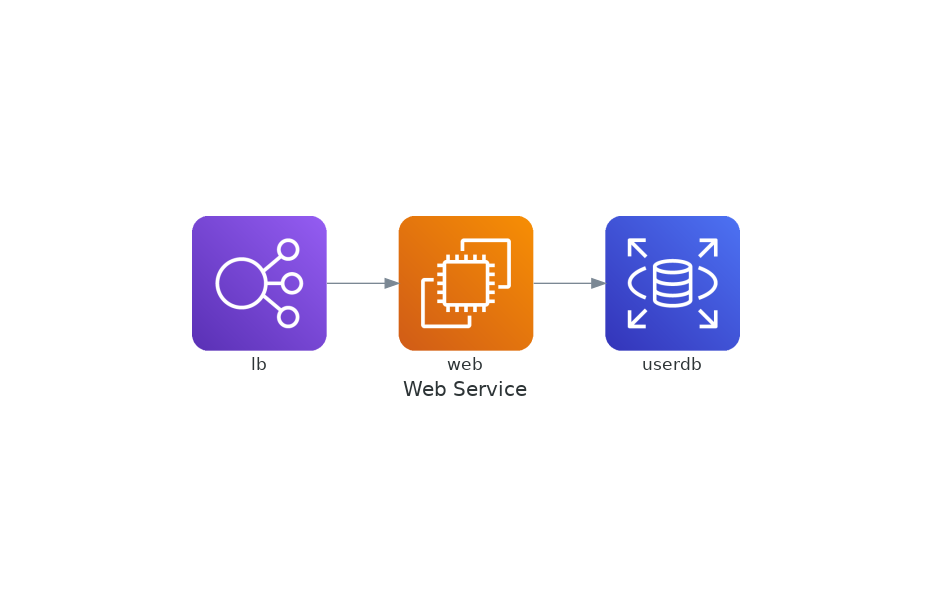

In [2]:
from IPython.display import Image
Image("web_service.png")

Alternatively, if you are vieweing this notebook in JupyterLab, you could just double-click on the image file name in the file navigation pane that would be typically to the left of this notebook. JupyterLab has built in rendering of image files.  
If you'd prefer to use JupyterLab and launched this typically into the classic notebook mode, just click on the 'Jupyter' logo above this notebook on the right side. In JupyterLab, you can switch back to the classic mode from the 'Help' menu.

## More examples

Examples from [the Diagram examples page in the documentation](https://diagrams.mingrammer.com/docs/getting-started/examples):

### Grouped Workers on AWS

In [3]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

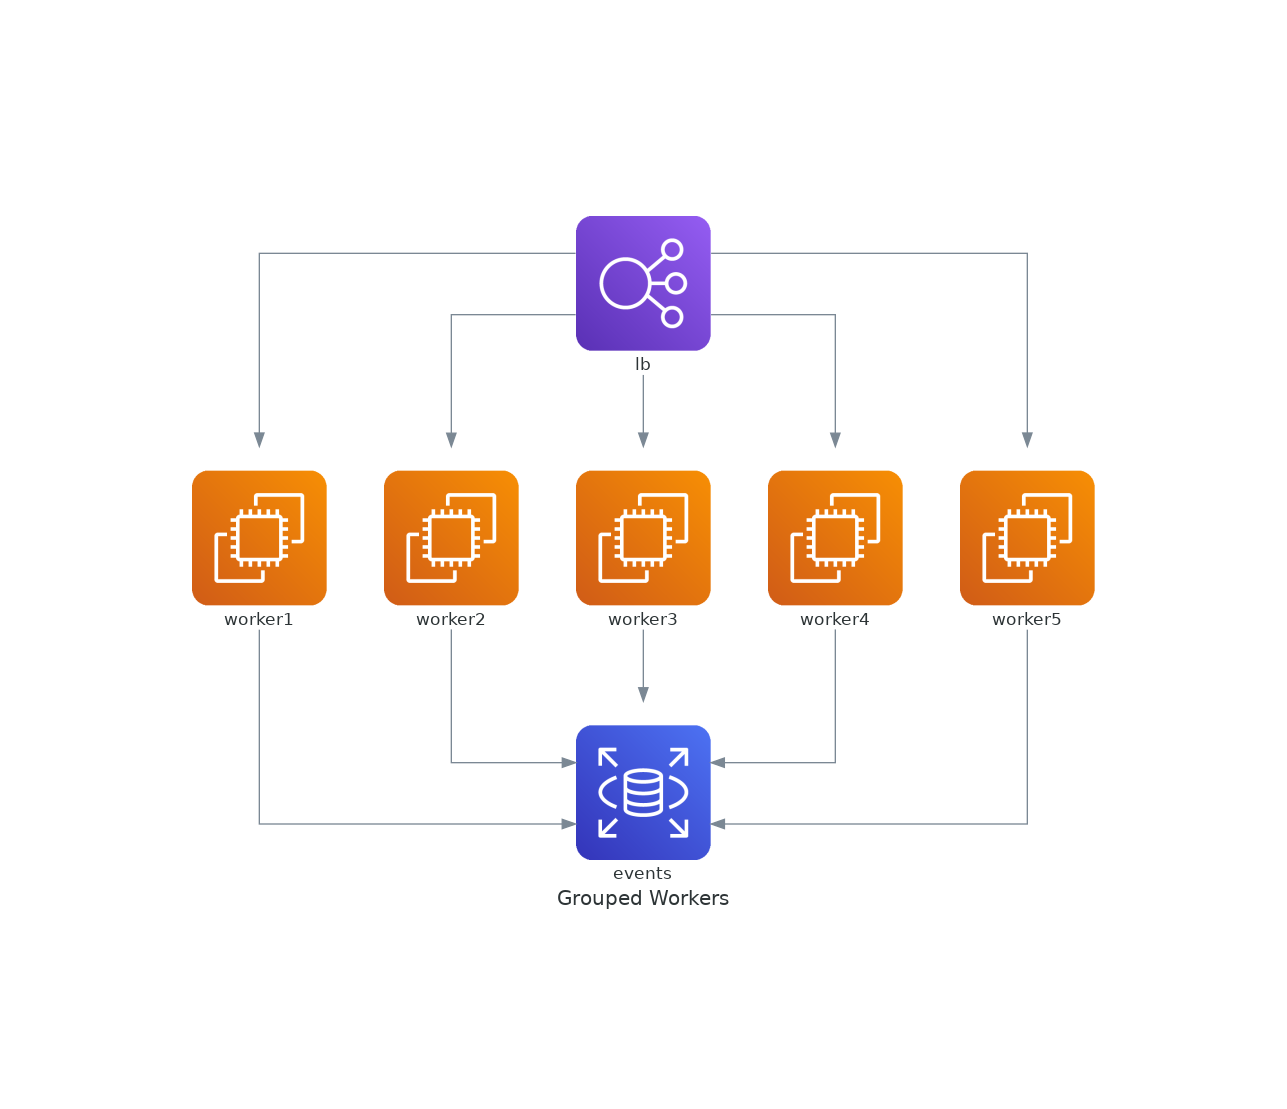

In [4]:
from IPython.display import Image
Image("grouped_workers.png")

### Clustered Web Services

In [5]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

with Diagram("Clustered Web Services", show=False):
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

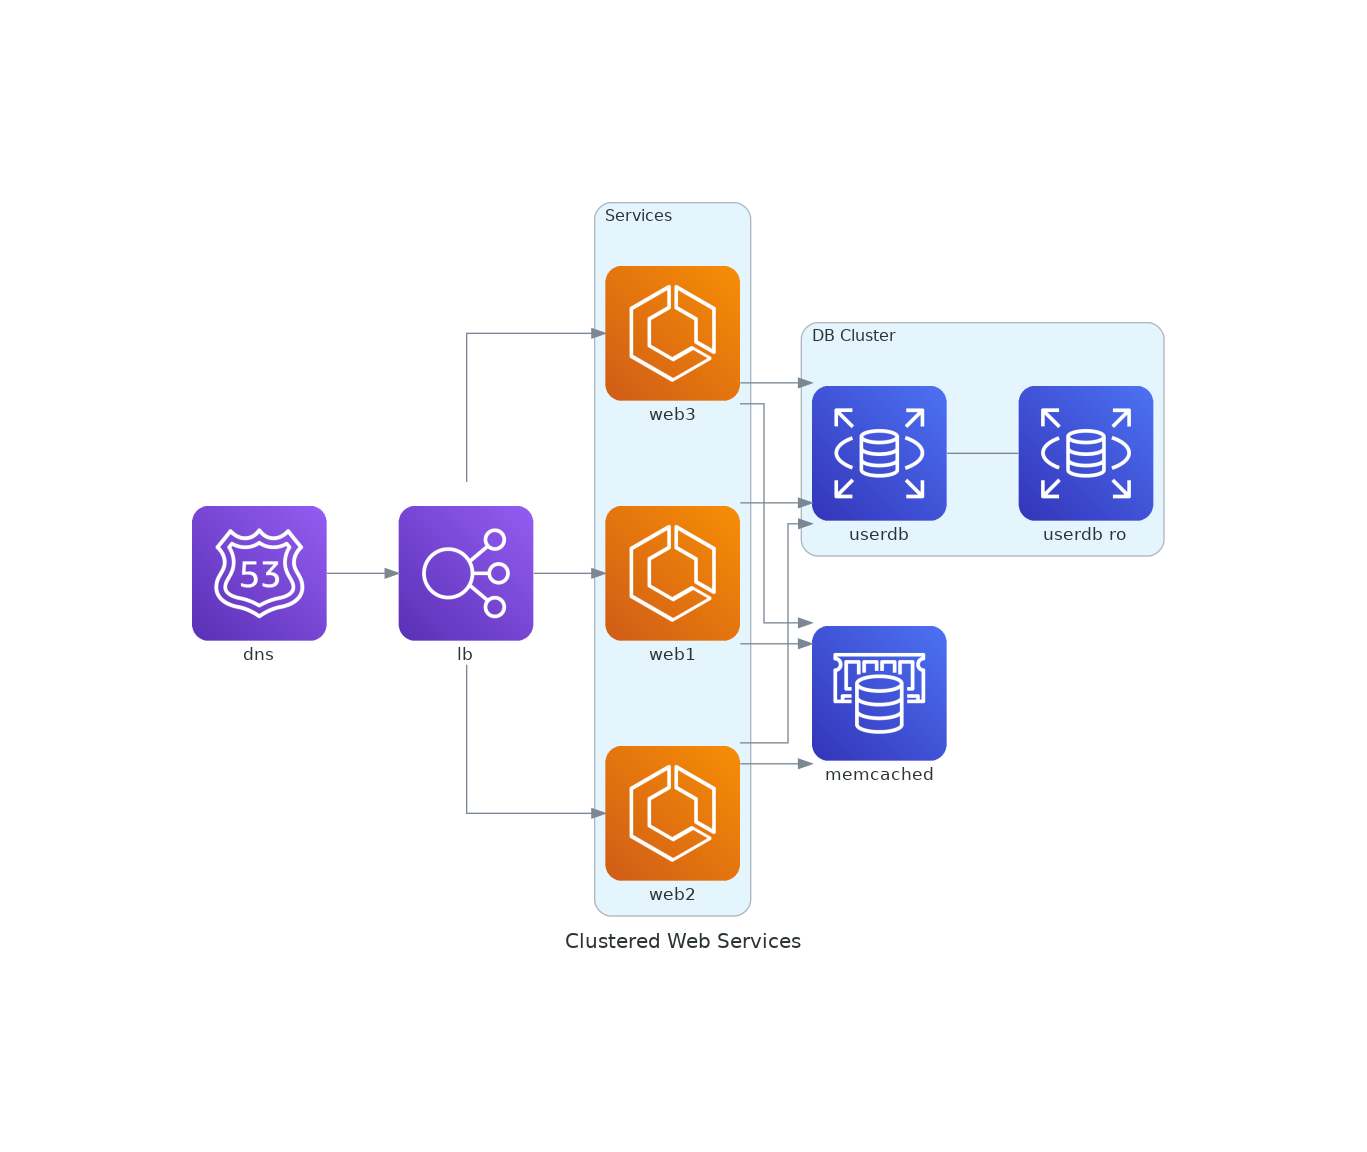

In [6]:
from IPython.display import Image
Image("clustered_web_services.png")

### Event Processing on AWS

In [7]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

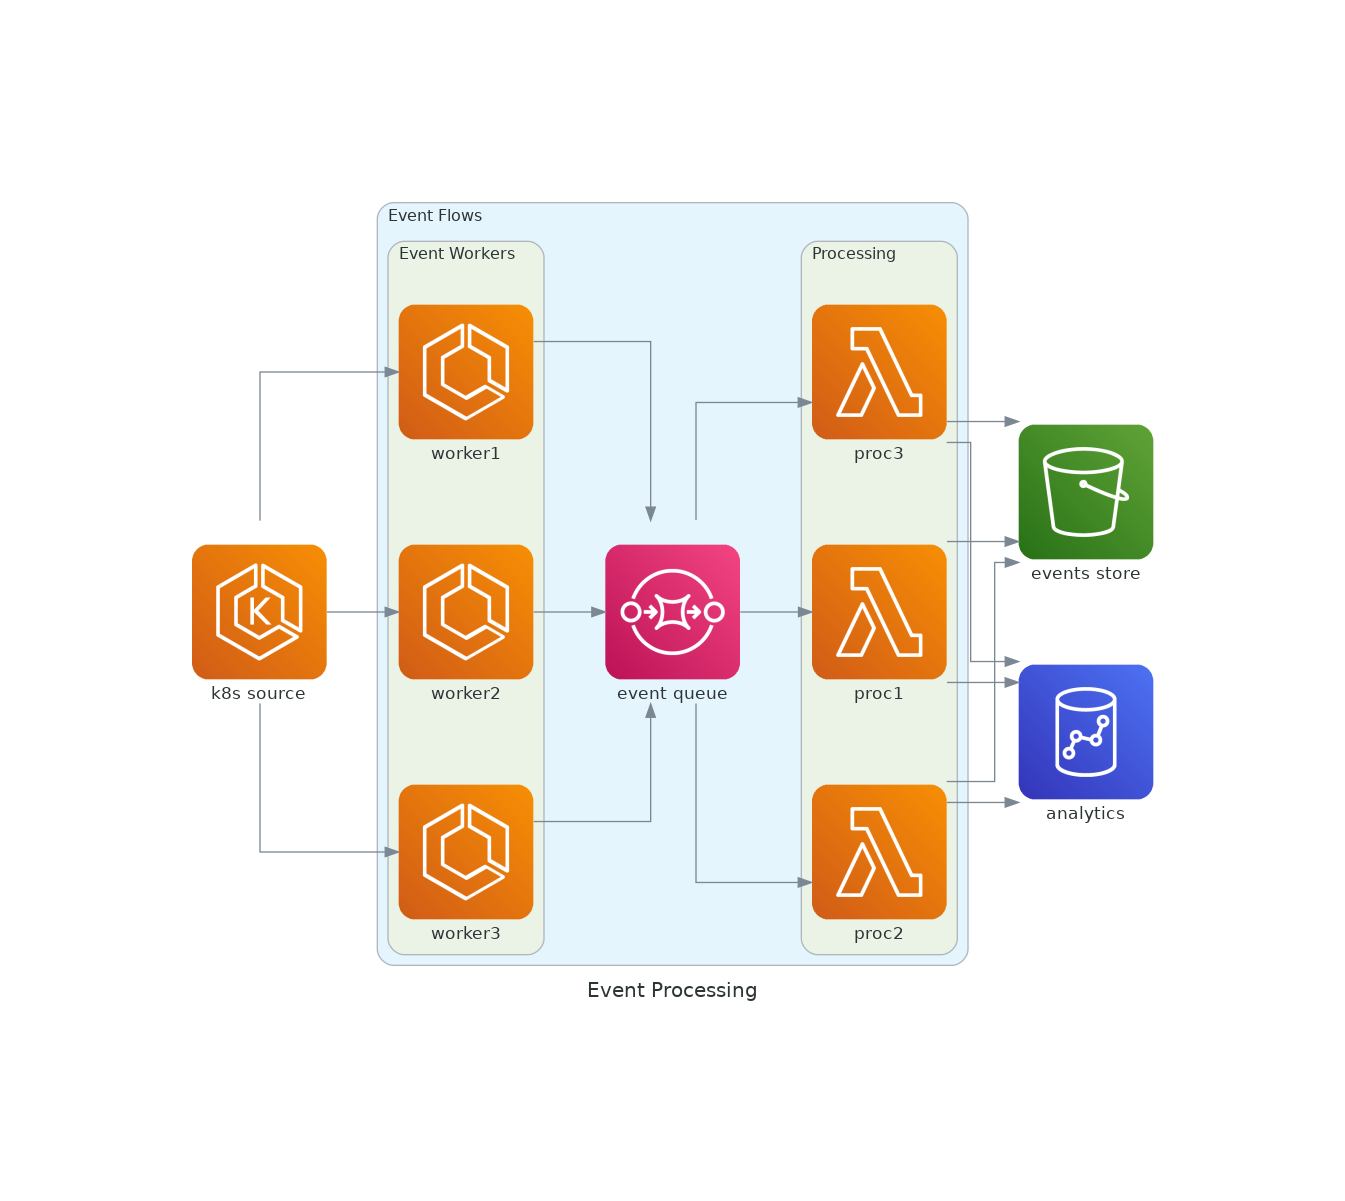

In [8]:
from IPython.display import Image
Image("event_processing.png")

### Message Collecting System on GCP

In [9]:
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False):
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

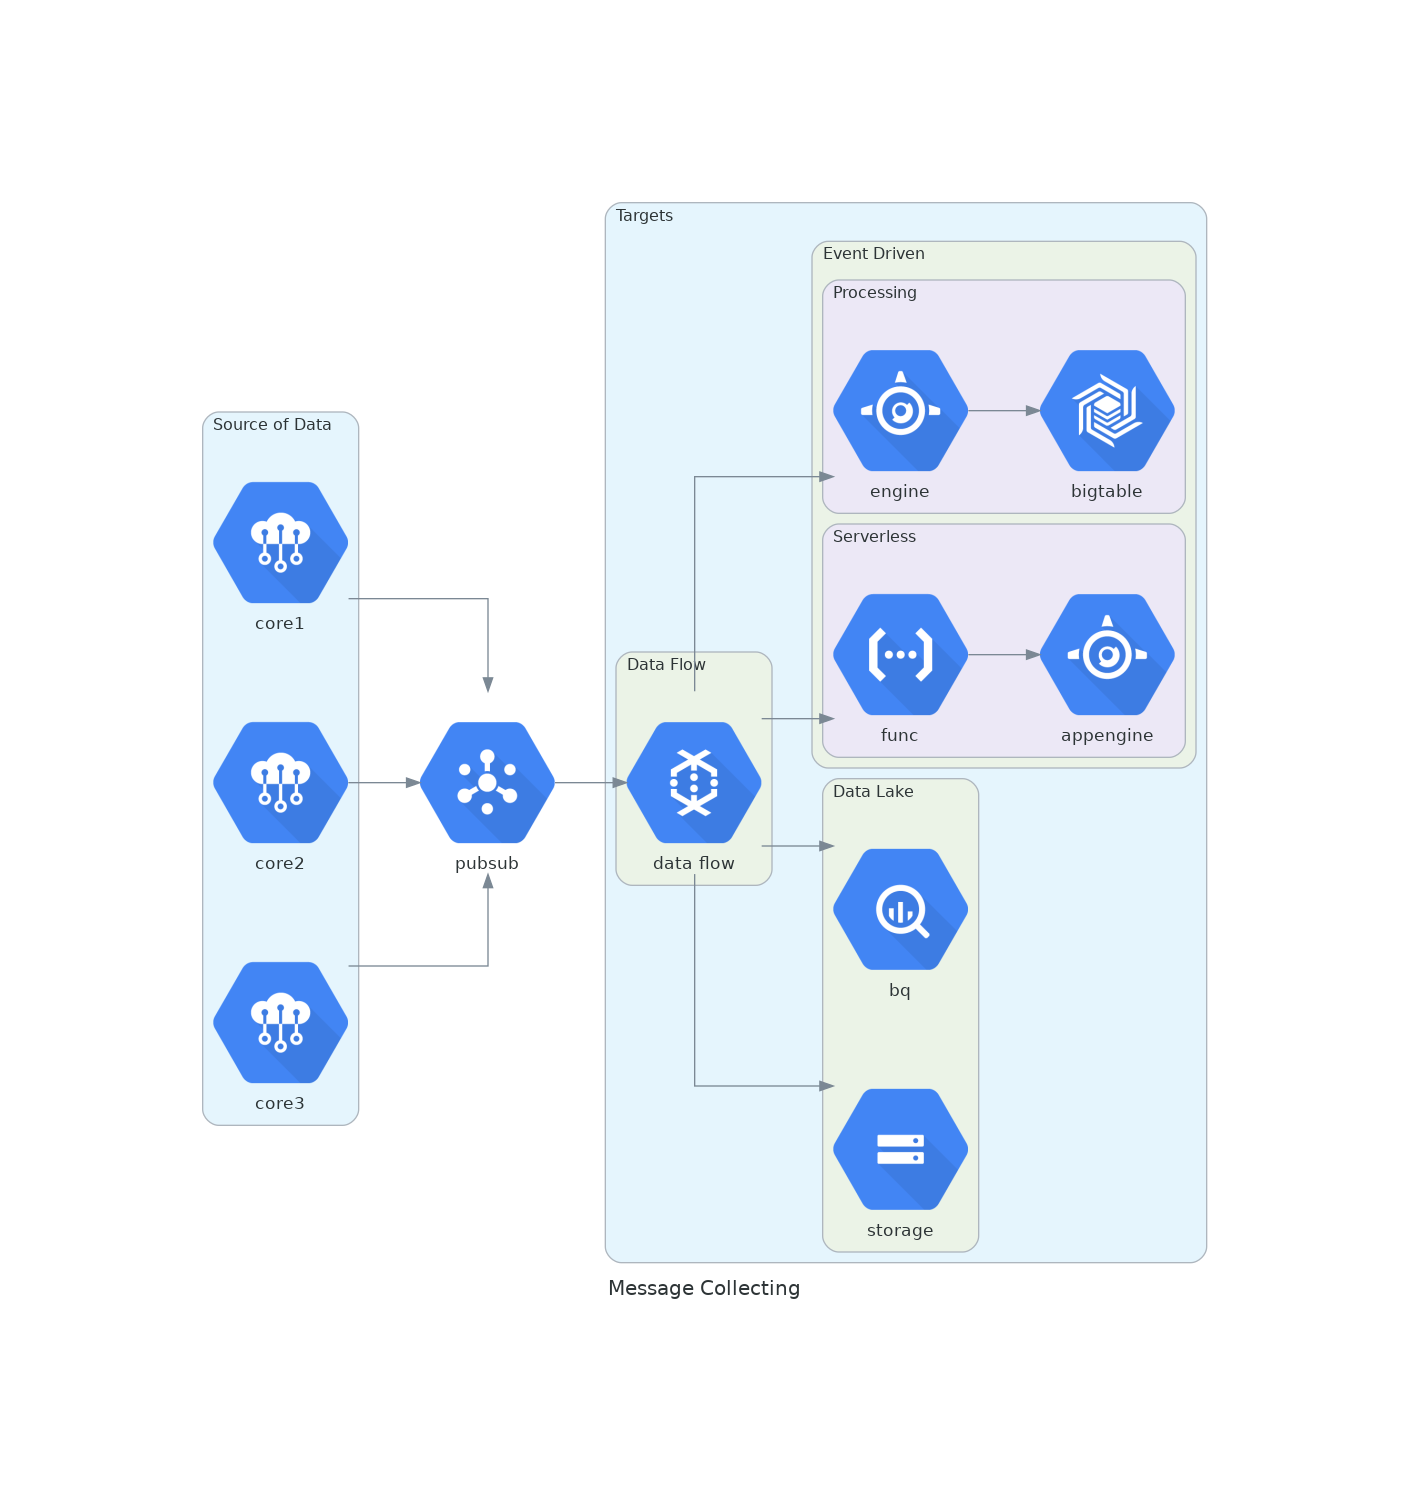

In [10]:
from IPython.display import Image
Image("message_collecting.png")

### Exposed Pod with 3 Replicas on Kubernetes

In [11]:
from diagrams import Diagram
from diagrams.k8s.clusterconfig import HPA
from diagrams.k8s.compute import Deployment, Pod, ReplicaSet
from diagrams.k8s.network import Ingress, Service

with Diagram("Exposed Pod with 3 Replicas", show=False):
    net = Ingress("domain.com") >> Service("svc")
    net >> [Pod("pod1"),
            Pod("pod2"),
            Pod("pod3")] << ReplicaSet("rs") << Deployment("dp") << HPA("hpa")

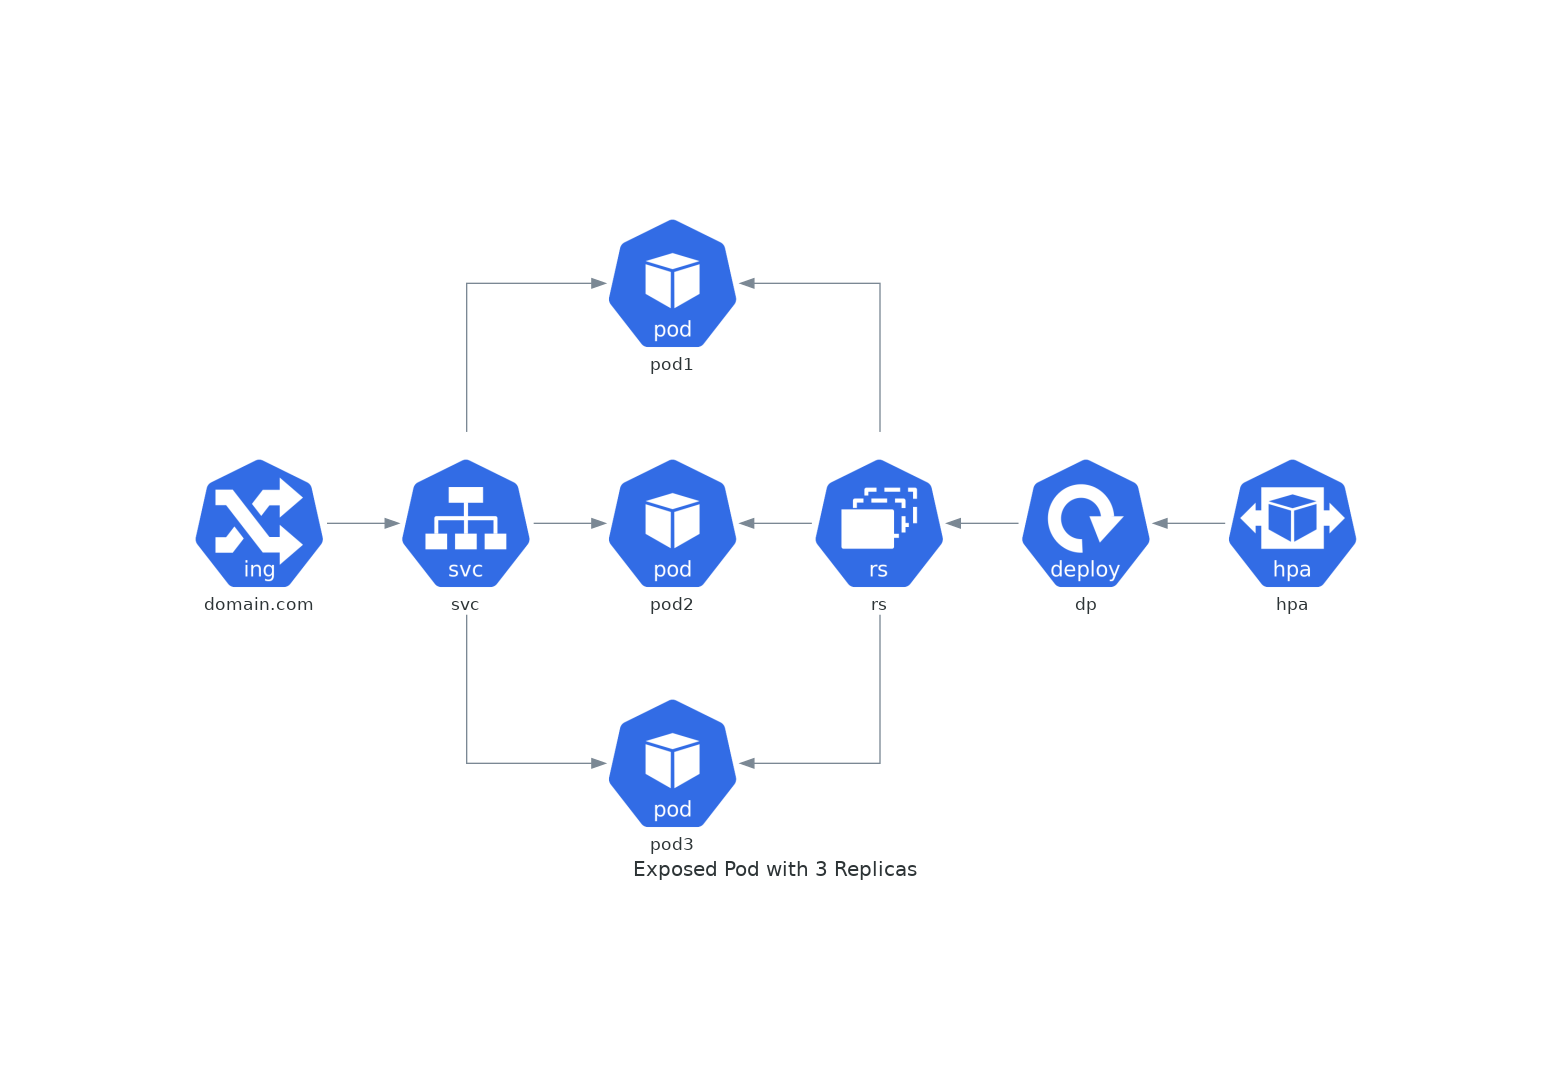

In [12]:
from IPython.display import Image
Image("exposed_pod_with_3_replicas.png")

### Stateful Architecture on Kubernetes

In [13]:
from diagrams import Cluster, Diagram
from diagrams.k8s.compute import Pod, StatefulSet
from diagrams.k8s.network import Service
from diagrams.k8s.storage import PV, PVC, StorageClass

with Diagram("Stateful Architecture", show=False):
    with Cluster("Apps"):
        svc = Service("svc")
        sts = StatefulSet("sts")

        apps = []
        for _ in range(3):
            pod = Pod("pod")
            pvc = PVC("pvc")
            pod - sts - pvc
            apps.append(svc >> pod >> pvc)

    apps << PV("pv") << StorageClass("sc")

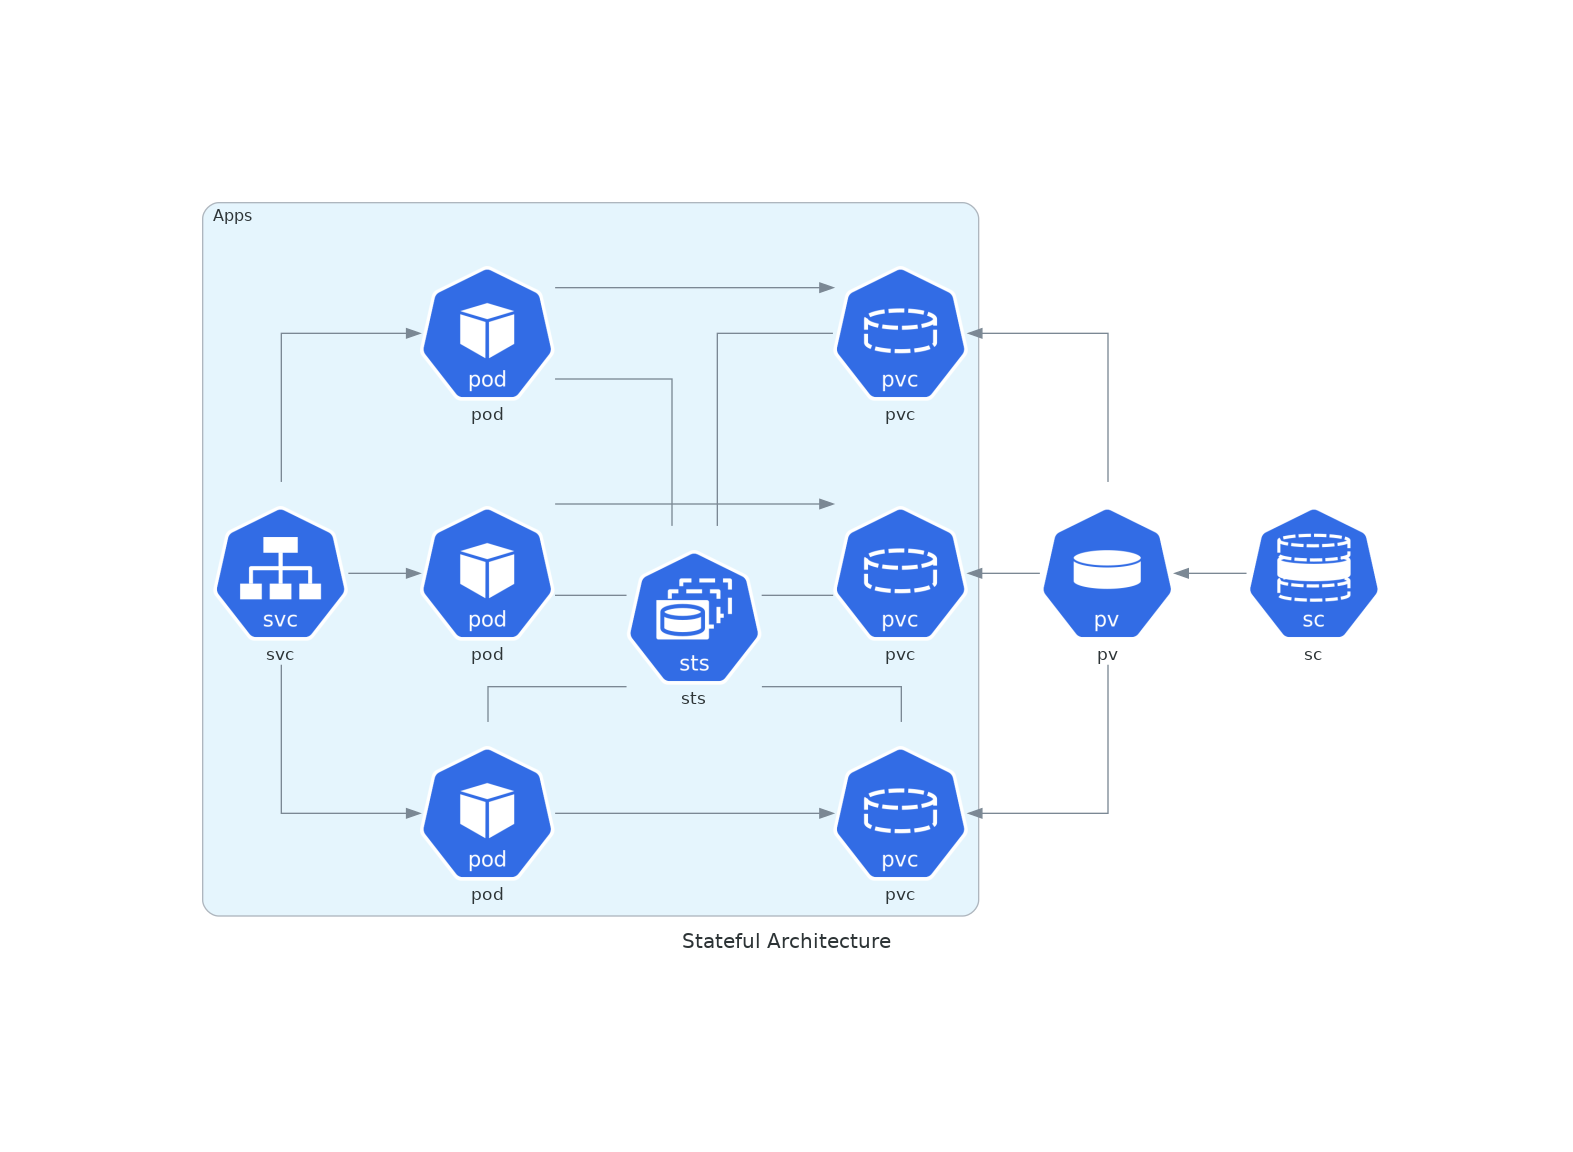

In [14]:
from IPython.display import Image
Image("stateful_architecture.png")

### Advanced Web Service with On-Premise

In [15]:
from diagrams import Cluster, Diagram
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram("Advanced Web Service with On-Premise", show=False):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Redis("replica") << metrics
        grpcsvc >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - PostgreSQL("replica") << metrics
        grpcsvc >> primary

    aggregator = Fluentd("logging")
    aggregator >> Kafka("stream") >> Spark("analytics")

    ingress >> grpcsvc >> aggregator

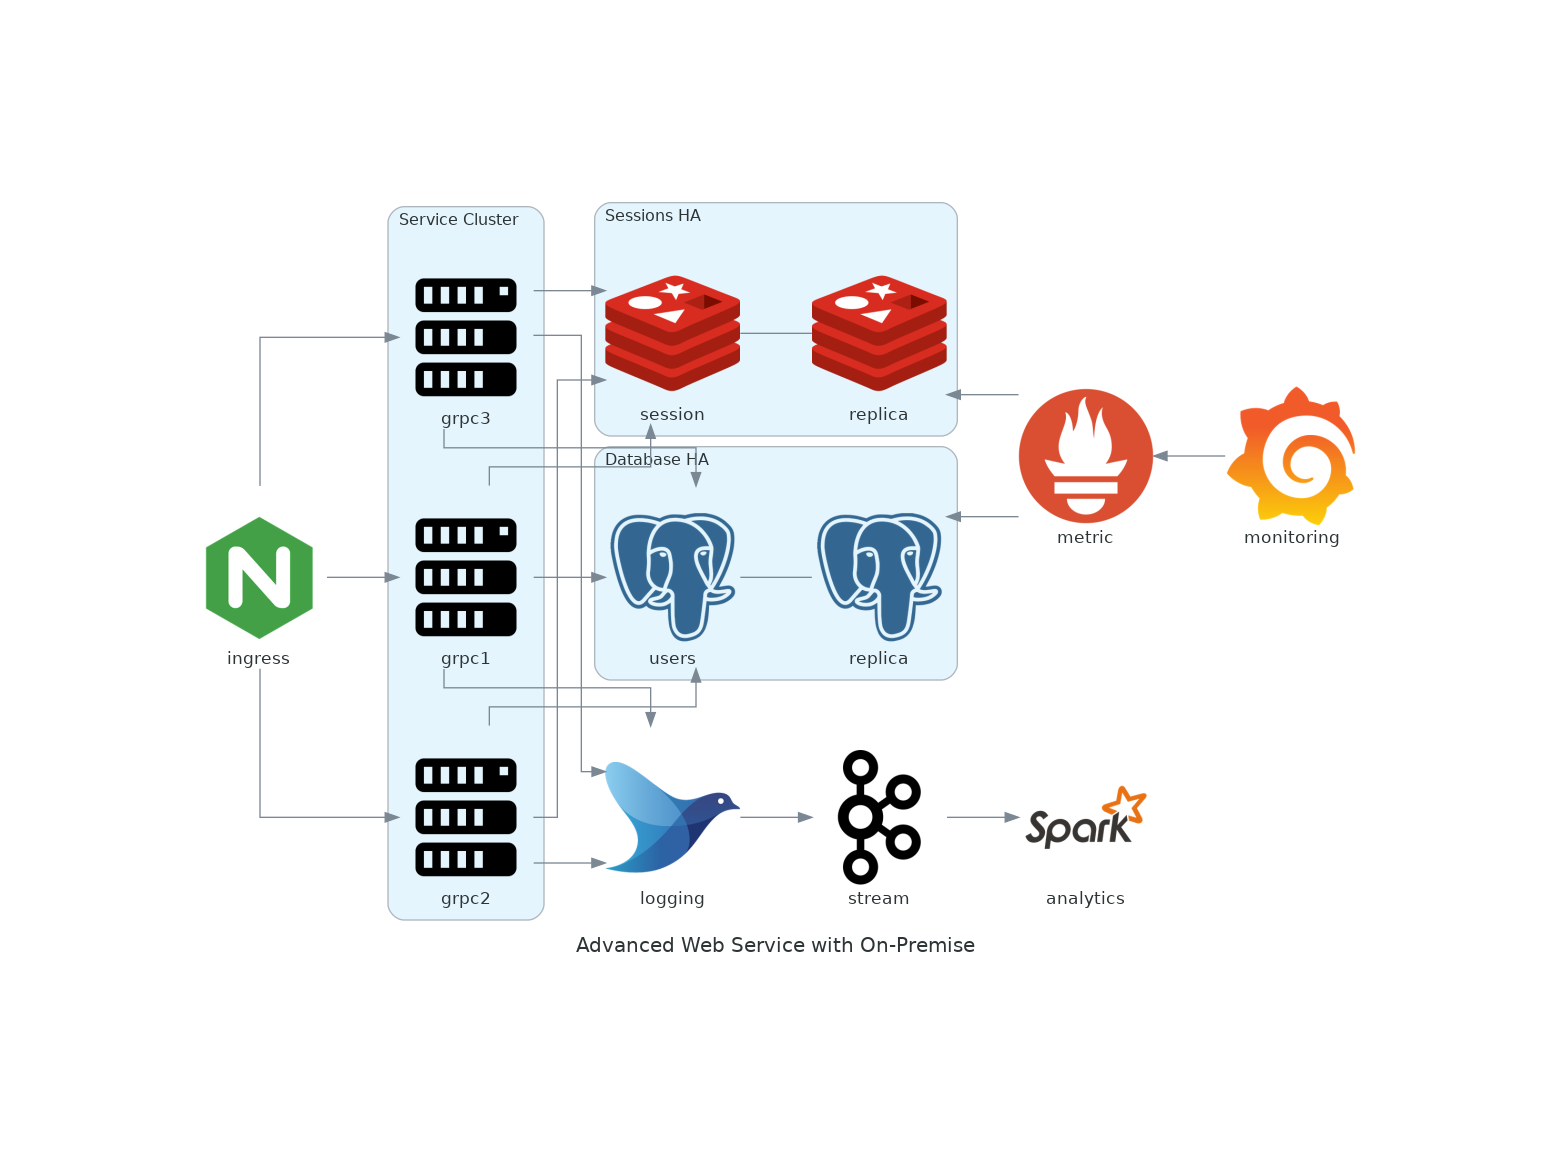

In [16]:
from IPython.display import Image
Image("advanced_web_service_with_on-premise.png")

### Advanced Web Service with On-Premise (with colors and labels)

In [17]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator

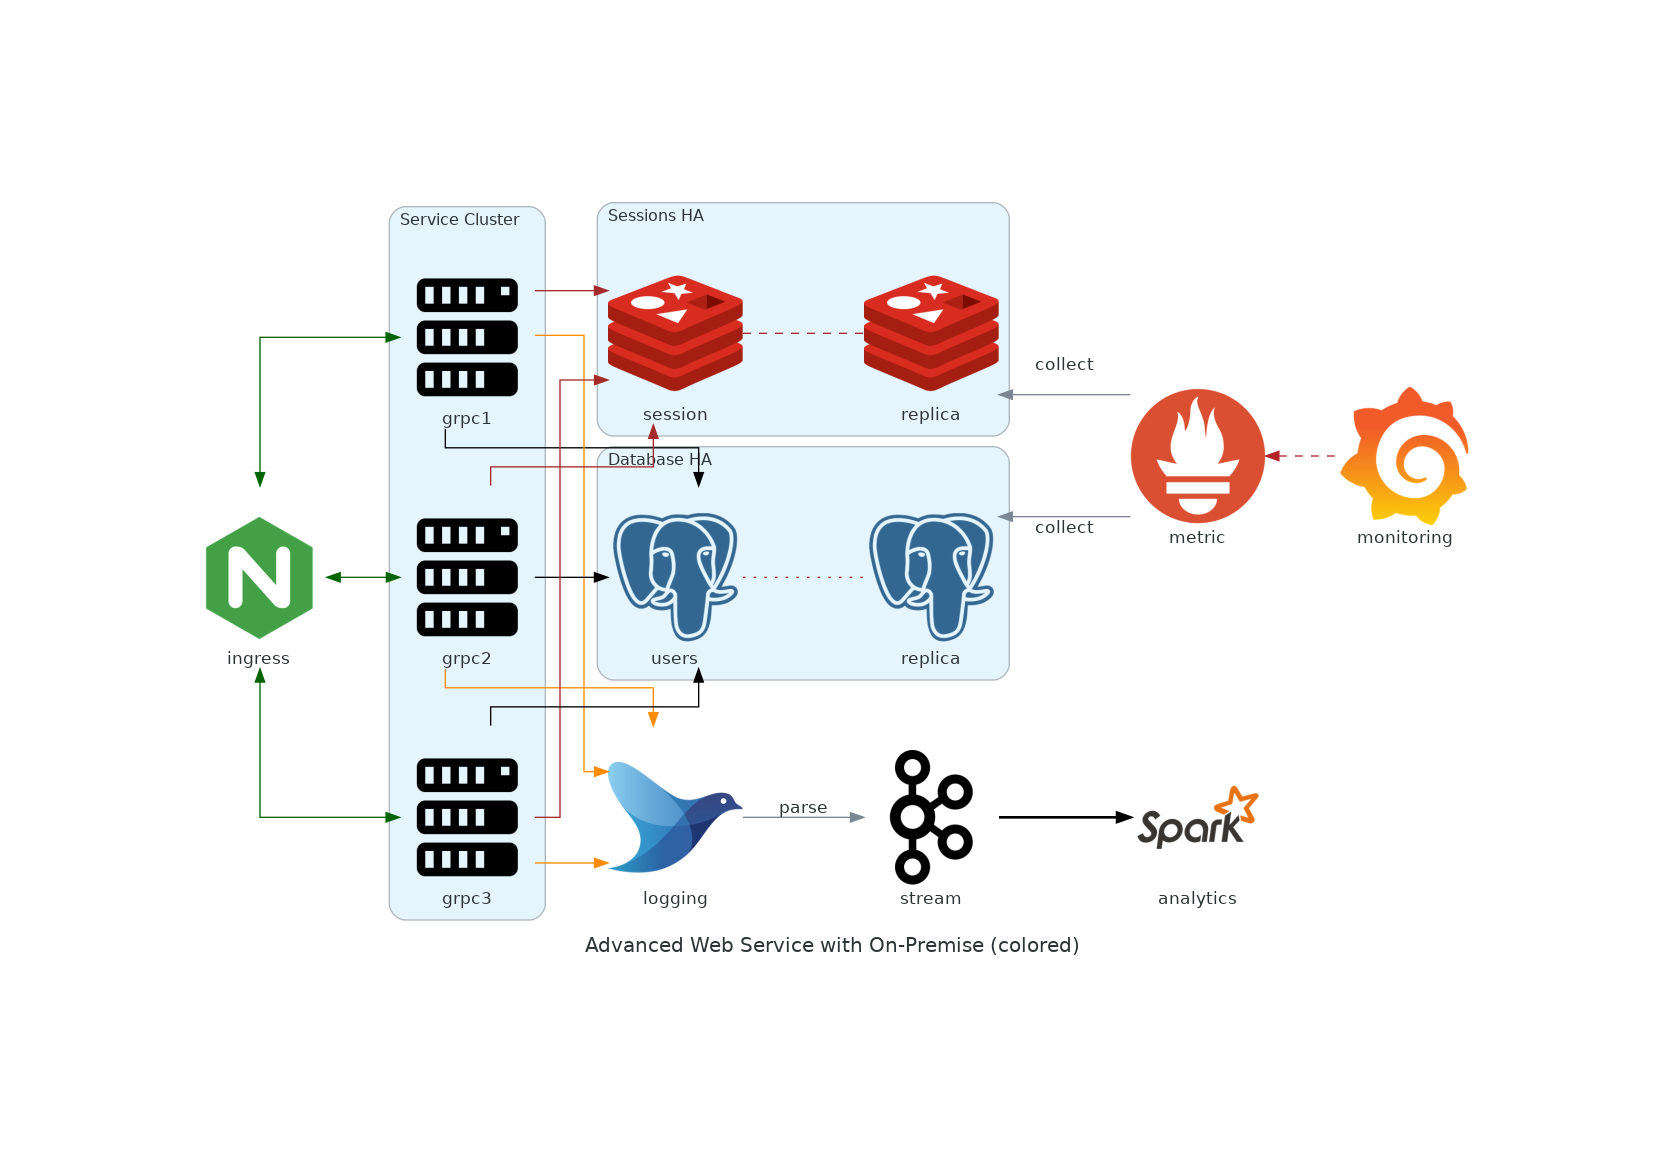

In [18]:
from IPython.display import Image
Image("advanced_web_service_with_on-premise_(colored).png")

### RabbitMQ Consumers with Custom Nodes

In [19]:
from urllib.request import urlretrieve

from diagrams import Cluster, Diagram
from diagrams.aws.database import Aurora
from diagrams.custom import Custom
from diagrams.k8s.compute import Pod

# Download an image to be used into a Custom Node class
rabbitmq_url = "https://jpadilla.github.io/rabbitmqapp/assets/img/icon.png"
rabbitmq_icon = "rabbitmq.png"
urlretrieve(rabbitmq_url, rabbitmq_icon)

with Diagram("Broker Consumers", show=False):
    with Cluster("Consumers"):
        consumers = [
            Pod("worker"),
            Pod("worker"),
            Pod("worker")]

    queue = Custom("Message queue", rabbitmq_icon)

    queue >> consumers >> Aurora("Database")

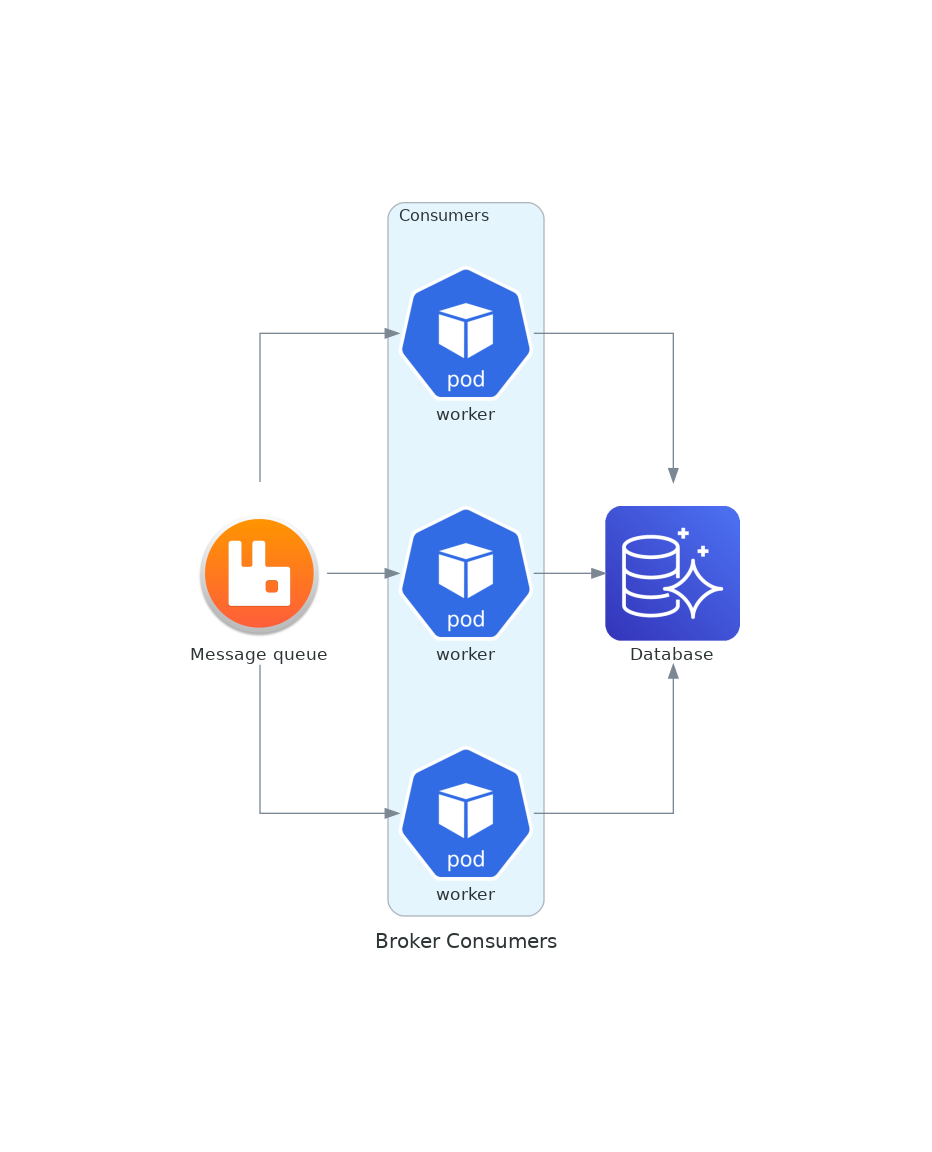

In [20]:
from IPython.display import Image
Image("broker_consumers.png")

## Custom Examples

Examples from the [custom examples page](https://diagrams.mingrammer.com/docs/nodes/custom)

### Custom with local icons

For the first example, we'lll demonstrate using local images first by getting some off the web and storing here.

In [21]:
!mkdir my_resources
!curl -o my_resources/cc_heart.black.png -L https://mirrors.creativecommons.org/presskit/icons/heart.black.png
!curl -o my_resources/cc_attribution.png -L https://mirrors.creativecommons.org/presskit/icons/by.xlarge.png
!curl -o my_resources/cc_sa.png -L https://mirrors.creativecommons.org/presskit/icons/sa.xlarge.png
!curl -o my_resources/cc_nd.png -L https://mirrors.creativecommons.org/presskit/icons/nd.xlarge.png
!curl -o my_resources/cc_zero.png -L https://mirrors.creativecommons.org/presskit/icons/zero.xlarge.png
!curl -o my_resources/cc_nc-jp.png -L https://mirrors.creativecommons.org/presskit/icons/nc-jp.xlarge.png
!curl -o my_resources/cc_nc-eu.png -L https://mirrors.creativecommons.org/presskit/icons/nc-eu.xlarge.png
!curl -o my_resources/cc_nc.png -L https://mirrors.creativecommons.org/presskit/icons/nc.xlarge.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59289  100 59289    0     0   536k      0 --:--:-- --:--:-- --:--:--  531k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63266  100 63266    0     0   605k      0 --:--:-- --:--:-- --:--:--  599k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77106  100 77106    0     0   549k      0 --:--:-- --:--:-- --:--:--  545k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60566  100 60566    0     0   687k      0 --:--:-- --:--:-- --:--:--  679k
  % Total    % Received % Xferd  Average Speed   Tim

These images are now files listed here in the `my_resources` directory.

In [22]:
ls my_resources 

cc_attribution.png  cc_nc-eu.png  cc_nc.png  cc_sa.png
cc_heart.black.png  cc_nc-jp.png  cc_nd.png  cc_zero.png


Now we can use those.

In [23]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom


with Diagram("Custom with local icons\n Can be downloaded here: \nhttps://creativecommons.org/about/downloads/", show=False, filename="custom_local", direction="LR"):
  cc_heart = Custom("Creative Commons", "./my_resources/cc_heart.black.png")
  cc_attribution = Custom("Credit must be given to the creator", "./my_resources/cc_attribution.png")

  cc_sa = Custom("Adaptations must be shared\n under the same terms", "./my_resources/cc_sa.png")
  cc_nd = Custom("No derivatives or adaptations\n of the work are permitted", "./my_resources/cc_nd.png")
  cc_zero = Custom("Public Domain Dedication", "./my_resources/cc_zero.png")

  with Cluster("Non Commercial"):
    non_commercial = [Custom("Y", "./my_resources/cc_nc-jp.png") - Custom("E", "./my_resources/cc_nc-eu.png") - Custom("S", "./my_resources/cc_nc.png")]

  cc_heart >> cc_attribution
  cc_heart >> non_commercial
  cc_heart >> cc_sa
  cc_heart >> cc_nd
  cc_heart >> cc_zero

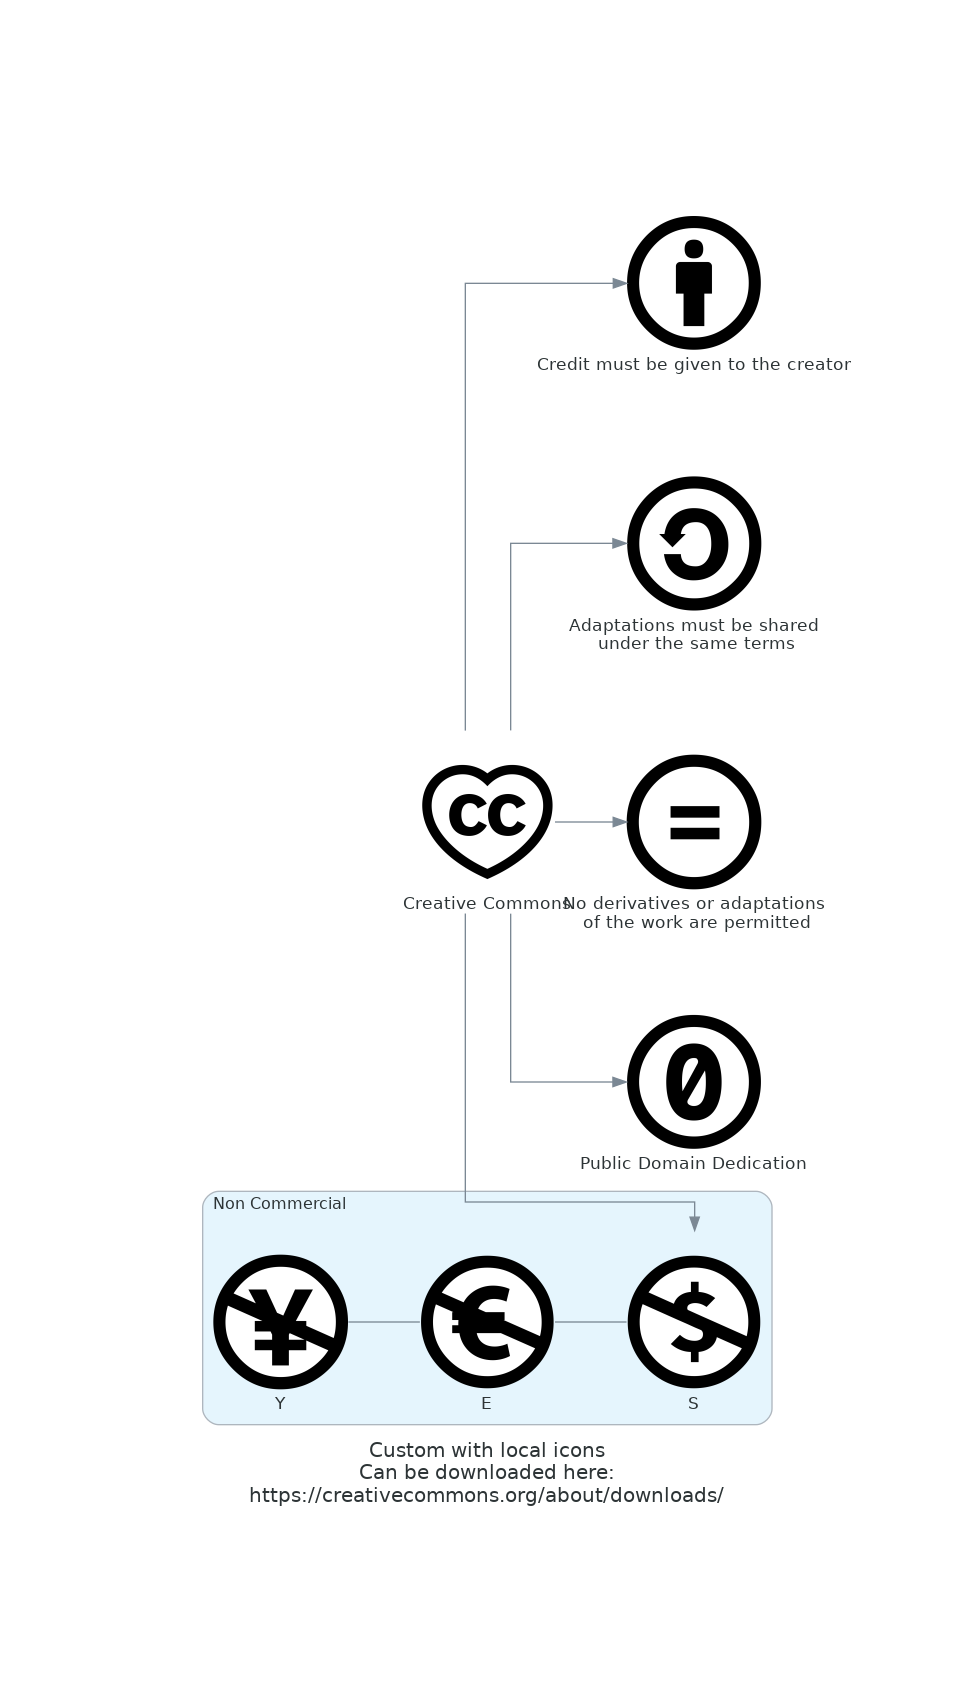

In [24]:
from IPython.display import Image
Image("custom_local.png")

### Custom with remote icons

If the icons are already online and accessible, you can reference them in the code.

In [25]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from urllib.request import urlretrieve

with Diagram("Custom with remote icons", show=False, filename="custom_remote", direction="LR"):

  # download the icon image file
  diagrams_url = "https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png"
  diagrams_icon = "diagrams.png"
  urlretrieve(diagrams_url, diagrams_icon)

  diagrams = Custom("Diagrams", diagrams_icon)

  with Cluster("Some Providers"):

    openstack_url = "https://github.com/mingrammer/diagrams/raw/master/resources/openstack/openstack.png"
    openstack_icon = "openstack.png"
    urlretrieve(openstack_url, openstack_icon)

    openstack = Custom("OpenStack", openstack_icon)

    elastic_url = "https://github.com/mingrammer/diagrams/raw/master/resources/elastic/saas/elastic.png"
    elastic_icon = "elastic.png"
    urlretrieve(elastic_url, elastic_icon)

    elastic = Custom("Elastic", elastic_icon)

  diagrams >> openstack
  diagrams >> elastic

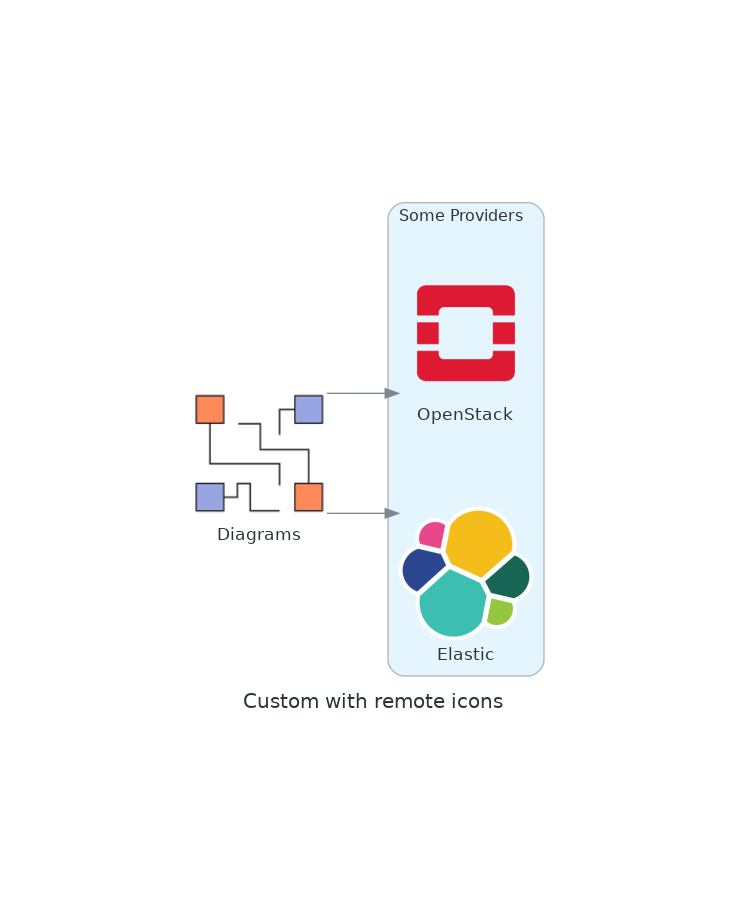

In [26]:
from IPython.display import Image
Image("custom_remote.png")

----- 

Enjoy!